In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Loading the data.**

In [50]:
df = pd.read_csv("Zoo.csv")
df.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [51]:
df.shape

(101, 18)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [53]:
df.isnull().sum()

,0
animal name,0
hair,0
feathers,0
eggs,0
milk,0
airborne,0
aquatic,0
predator,0
toothed,0
backbone,0


**There are no missing values in the given dataset.**

In [54]:
df["animal name"].nunique()

100

In [55]:
df["type"].value_counts()

,count
type,
1,41
2,20
4,13
7,10
6,8
3,5
5,4


In [56]:
df = df.drop(columns=["animal name"])

We will drop the 'animal name' column as it is categorical and it has many features.

In [57]:
df.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


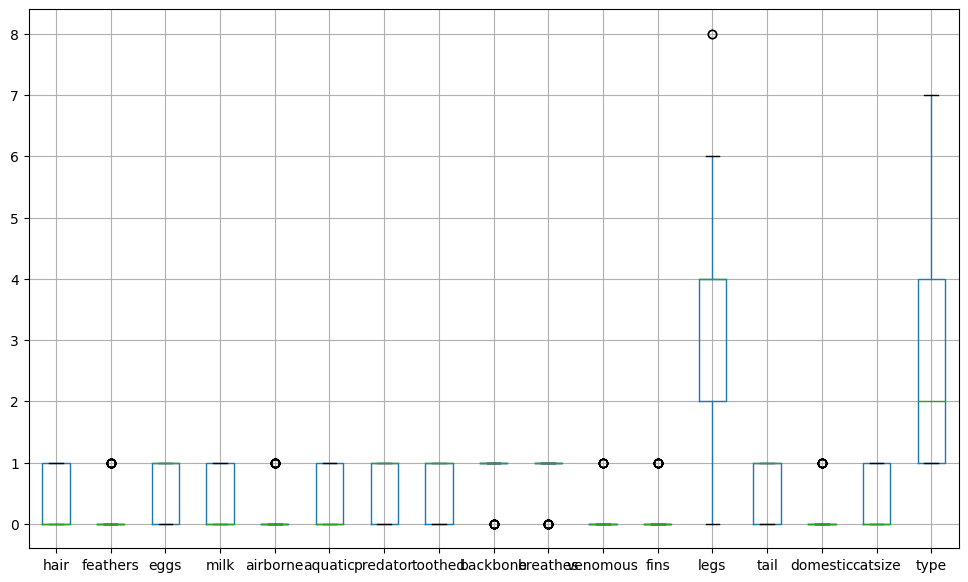

In [58]:
df.boxplot(figsize=(12,7))
plt.show()

**From the above boxplot visualization we can infer that column 'leg' has outlier.**

<ipython-input-59-f05088171632>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['legs'])


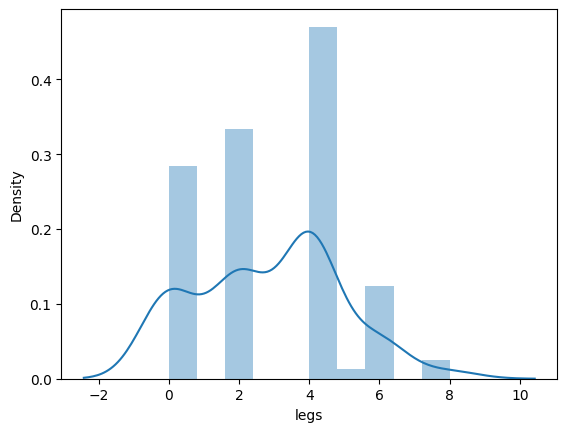

In [59]:
sns.distplot(df['legs'])
plt.show()

<ipython-input-60-1b62ff08a3f3>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['type'])


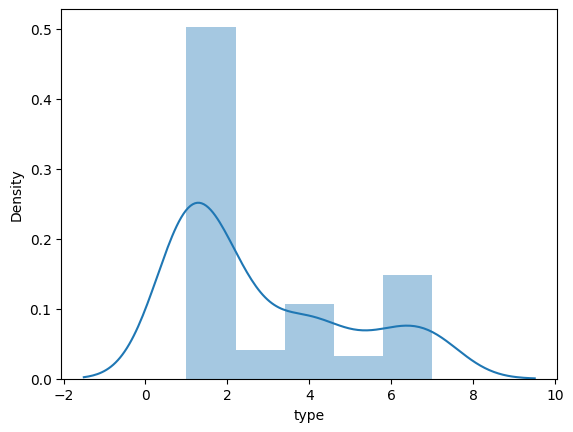

In [60]:
sns.distplot(df['type'])
plt.show()

In [61]:
Q1 = df['legs'].quantile(0.25)
Q3 = df['legs'].quantile(0.75)
IQR = Q3 - Q1

In [62]:
IQR

2.0

In [63]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(lower_bound)
print(upper_bound)

-1.0
7.0


In [64]:
df = df[(df['legs'] >= lower_bound) & (df['legs'] <= upper_bound)]

**So we will remove the outlier value from the 'legs' column.**

<Axes: >

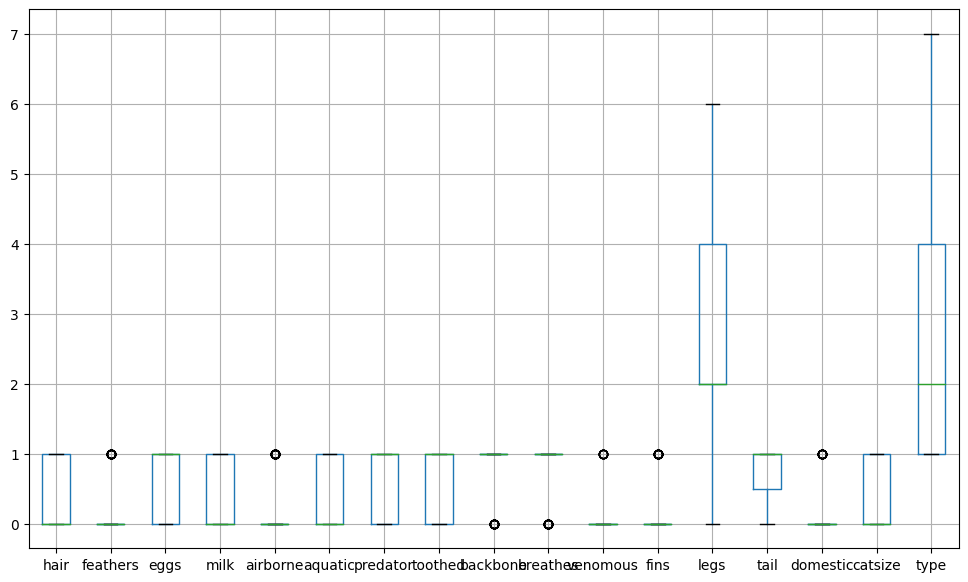

In [83]:
df.boxplot(figsize=(12,7))

In [66]:
x = df.drop("type", axis=1)
y = df["type"]

**We will split the data into training and testing data.**

In [67]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [68]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((79, 16), (20, 16), (79,), (20,))

**We will rescale the values. (Standardization)**

In [69]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [70]:
x_train

array([[ 1.24434203, -0.56273143, -1.21191996, ...,  0.56273143,
        -0.40219983, -0.7824608 ],
       [-0.80363756,  1.77704663,  0.825137  , ...,  0.56273143,
        -0.40219983,  1.2780193 ],
       [ 1.24434203, -0.56273143, -1.21191996, ...,  0.56273143,
        -0.40219983,  1.2780193 ],
       ...,
       [-0.80363756, -0.56273143,  0.825137  , ..., -1.77704663,
        -0.40219983, -0.7824608 ],
       [ 1.24434203, -0.56273143, -1.21191996, ...,  0.56273143,
        -0.40219983, -0.7824608 ],
       [ 1.24434203, -0.56273143,  0.825137  , ..., -1.77704663,
        -0.40219983, -0.7824608 ]])

**Now we try to build the KNN classifier model.**

In [71]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

In [72]:
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [73]:
y_pred = knn.predict(x_test)

In [74]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_score(y_pred, y_test)

0.85

**We got the accuracy of 85%, this is after removing the outlier.**

In [75]:
confusion_matrix(y_pred, y_test)

array([[10,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  3,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  3,  1],
       [ 0,  0,  0,  0,  0,  0,  0]])

In [76]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       1.00      0.50      0.67         2
           3       0.00      0.00      0.00         1
           4       1.00      1.00      1.00         3
           5       0.00      0.00      0.00         0
           6       1.00      0.75      0.86         4
           7       0.00      0.00      0.00         0

    accuracy                           0.85        20
   macro avg       0.57      0.46      0.50        20
weighted avg       0.95      0.85      0.89        20



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [77]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

In [78]:
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

In [79]:
knn_pca = KNeighborsClassifier(n_neighbors=5)
knn_pca.fit(x_train_pca, y_train)

KNeighborsClassifier()

In [80]:
x_min, x_max = x_train_pca[:, 0].min() - 1, x_train_pca[:, 0].max() + 1
y_min, y_max = x_train_pca[:, 1].min() - 1, x_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))

In [81]:
Z = knn_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

**We try to visualize the decision boundaries after applying PCA and retraining using KNN classifier.**

<ipython-input-82-fad2cdb2ed15>:4: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x_test_pca[:, 0], x_test_pca[:, 1], c=y_test, edgecolors='k', cmap=plt.cm.RdYlBu, s=100, marker='x', label='Testing Data')


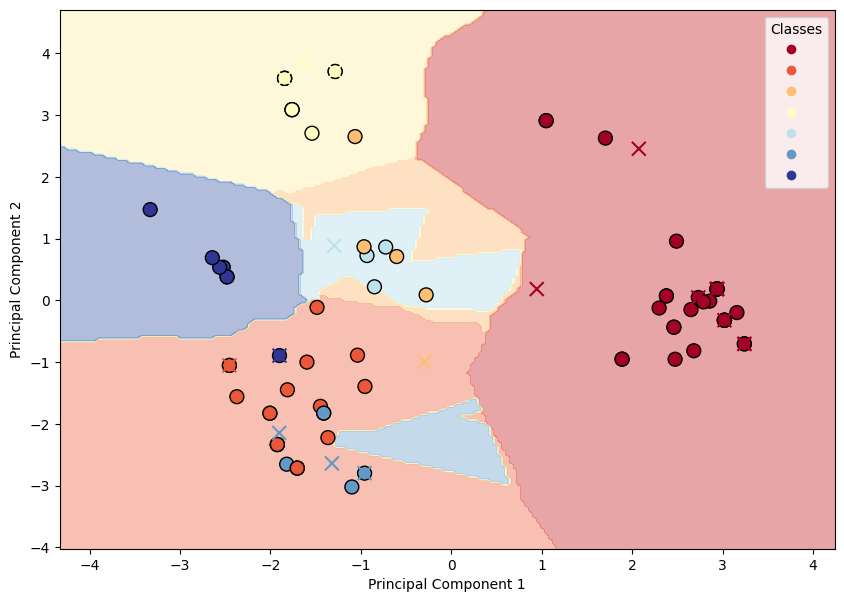

In [82]:
plt.figure(figsize=(10, 7))
plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.RdYlBu)
scatter = plt.scatter(x_train_pca[:, 0], x_train_pca[:, 1], c=y_train, edgecolors='k', cmap=plt.cm.RdYlBu, s=100, marker='o', label='Training Data')
plt.scatter(x_test_pca[:, 0], x_test_pca[:, 1], c=y_test, edgecolors='k', cmap=plt.cm.RdYlBu, s=100, marker='x', label='Testing Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(handles=scatter.legend_elements()[0], title="Classes", loc="upper right")
plt.show()

**Hyperparameters in the KNN.**

-> **n_neighbors:** It is the most important hyperparameter used in the KNN, which defines the number of neighbours.

Some other hyperparameters are weights and metric.


**Distance metrics used in KNN.**

-> **Euclidean distance:** The most popular distance metric, which is the straight-line distance between two points in a vector space.

-> **Manhattan distance:** The sum of the absolute differences between the corresponding coordinates of two points.